In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("Car details.csv")
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
cars.shape

(8128, 13)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
cars.dropna(inplace = True)

In [7]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Veri Temizleme

#### TORK DEĞERLERİNİ TEMİZLEME

In [8]:
torque_rpm = []
def RPMalma(x):
    for item in x:
        res = item.replace(".", "")
        res = res.replace(",", "")
        temp = [int(i) for i in re.findall(r"\d+", res)]
        torque_rpm.append(max(temp))

In [9]:
torque_list = cars["torque"]
torque_list[0:5]

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [10]:
RPMalma(torque_list)
torque_rpm[0:5]

[2000, 2500, 2700, 2750, 4500]

In [11]:
cars["torque_rpm"] = torque_rpm
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500


#### GÜÇ DEĞERLERİNİ TEMİZLEME

In [12]:
max_guc = []
def GUCalma(x):
    for i in x:
        i = i.split()[0]
        max_guc.append(float(i))

In [13]:
power_list = cars["max_power"]
power_list[0:5]

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [14]:
GUCalma(power_list)
max_guc[0:5]

[74.0, 103.52, 78.0, 90.0, 88.2]

In [15]:
cars["max_guc"] = max_guc
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20


#### HACİM DEĞERLERİNİ TEMİZLEME

In [16]:
motor_hacmi = []
def HACIMalma(x):
    for i in x:
        i = i.split()[0]
        motor_hacmi.append(int(i))

In [17]:
engine_list = cars["engine"]
engine_list[0:5]

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [18]:
HACIMalma(engine_list)
motor_hacmi[0:5]

[1248, 1498, 1497, 1396, 1298]

In [19]:
cars["motor_hacmi"] = motor_hacmi
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298


#### VİTES DEĞERLERİNİ TEMİZLEME

In [20]:
cars.groupby("transmission").count()

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi
transmission,,,,,,,,,,,,,,,
Automatic,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
Manual,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865


In [21]:
vites = []
def VITESalma(x):
    for i in x:
        if i == "Manual":
            vites.append(0)
        elif i == "Automatic":
            vites.append(1)

In [22]:
transmission_list = cars["transmission"]
transmission_list[0:5]

0    Manual
1    Manual
2    Manual
3    Manual
4    Manual
Name: transmission, dtype: object

In [23]:
VITESalma(transmission_list)
vites[0:5]

[0, 0, 0, 0, 0]

In [24]:
cars["vites_turu"] = vites
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298,0


#### SATICI TİPİ DEĞERLERİNİ TEMİZLEME

In [25]:
cars.groupby("seller_type").count()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu
seller_type,,,,,,,,,,,,,,,,
Dealer,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
Individual,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563
Trustmark Dealer,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236


In [26]:
satici = []
def SATtipi(x):
    for i in x:
        if i == "Dealer":
            satici.append(0)
        elif i == "Individual":
            satici.append(1)
        elif i == "Trustmark Dealer":
            satici.append(-1)

In [27]:
satici_tipi = cars["seller_type"]
satici_tipi[0:5]

0    Individual
1    Individual
2    Individual
3    Individual
4    Individual
Name: seller_type, dtype: object

In [28]:
SATtipi(satici_tipi)
satici[0:5]

[1, 1, 1, 1, 1]

In [29]:
cars["satici_tipi"] = satici
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298,0,1


#### YAKIT DEĞERLERİNİ TEMİZLEME

In [30]:
cars.groupby("fuel").count()

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi
fuel,,,,,,,,,,,,,,,,,
CNG,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Diesel,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299
LPG,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Petrol,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520


In [31]:
yakit = []
def YAKITtipi(x):
    for i in x:
        if i == "Petrol":
            yakit.append(0)
        elif i == "Diesel":
            yakit.append(1)
        else:
            yakit.append(-1)

In [32]:
fuel_list = cars["fuel"]
fuel_list[0:5]

0    Diesel
1    Diesel
2    Petrol
3    Diesel
4    Petrol
Name: fuel, dtype: object

In [33]:
YAKITtipi(fuel_list)
yakit[0:5]

[1, 1, 0, 1, 0]

In [34]:
cars["yakit_tipi"] = yakit
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248,0,1,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498,0,1,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497,0,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396,0,1,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298,0,1,0


#### FAZLA SÜTUNLARI ÇIKARMA

name===> İsmi makine öğrenmesinde kullanamıyouz

owner===> Önemli olmadığını düşündüğüm için attım

mileage===> km_driven değeri de aynı amaçla kullanıldığı için attım(sadece birim farklı)

In [35]:
cars.drop(["name","fuel", "seller_type", "transmission", "owner", "mileage", "engine", "max_power", "torque"], axis = 1, inplace = True)
cars.head(5)

,year,selling_price,km_driven,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
0,2014,450000,145500,5.0,2000,74.00,1248,0,1,1
1,2014,370000,120000,5.0,2500,103.52,1498,0,1,1
2,2006,158000,140000,5.0,2700,78.00,1497,0,1,0
3,2010,225000,127000,5.0,2750,90.00,1396,0,1,1
4,2007,130000,120000,5.0,4500,88.20,1298,0,1,0


In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   seats          7906 non-null   float64
 4   torque_rpm     7906 non-null   int64  
 5   max_guc        7906 non-null   float64
 6   motor_hacmi    7906 non-null   int64  
 7   vites_turu     7906 non-null   int64  
 8   satici_tipi    7906 non-null   int64  
 9   yakit_tipi     7906 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 679.4 KB


In [37]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.0,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.0,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.0,2360457.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.0,14.0
torque_rpm,7906.0,3474.631419,2579.612132,400.0,2500.00,3000.0,4000.0,43639.0
max_guc,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.0,400.0
motor_hacmi,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.0,3604.0
vites_turu,7906.0,0.131672,0.338155,0.0,0.00,0.0,0.0,1.0
satici_tipi,7906.0,0.800278,0.468575,-1.0,1.00,1.0,1.0,1.0
yakit_tipi,7906.0,0.532760,0.520547,-1.0,0.00,1.0,1.0,1.0


#### OUTLIERS DEĞERLERiATMA

In [38]:
degerler = cars.describe().T

for x in range(len(degerler)):
    IQR = degerler.iloc[x]["75%"] - degerler.iloc[x]["25%"]
    minimum = degerler.iloc[x]["25%"] - IQR*1.5
    maksimum = degerler.iloc[x]["75%"] + IQR*1.5
    print("{}===>min:{} / max:{}".format(degerler.index[x], minimum, maksimum))

year===>min:2004.5 / max:2024.5
selling_price===>min:-360000.0 / max:1320000.0
km_driven===>min:-55637.5 / max:186062.5
seats===>min:5.0 / max:5.0
torque_rpm===>min:250.0 / max:6250.0
max_guc===>min:17.124999999999993 / max:152.925
motor_hacmi===>min:619.5 / max:2159.5
vites_turu===>min:0.0 / max:0.0
satici_tipi===>min:1.0 / max:1.0
yakit_tipi===>min:-1.5 / max:2.5


In [39]:
cars = cars[(cars["selling_price"] >= -360000.0) & (cars["selling_price"] <= 1320000.0) & 
        (cars["km_driven"] >= -55637.5) & (cars["km_driven"] <= 186062.5) &
        (cars["torque_rpm"] >= 250.0) & (cars["torque_rpm"] <= 6250.0) &
        (cars["max_guc"] >= 17.125) & (cars["max_guc"] <= 152.925) & 
        (cars["motor_hacmi"] >= 619.5) & (cars["motor_hacmi"] <= 2159.5)]

## Temizlenmiş Veriyi İnceleme

In [40]:
cars.head()

,year,selling_price,km_driven,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
0,2014,450000,145500,5.0,2000,74.00,1248,0,1,1
1,2014,370000,120000,5.0,2500,103.52,1498,0,1,1
2,2006,158000,140000,5.0,2700,78.00,1497,0,1,0
3,2010,225000,127000,5.0,2750,90.00,1396,0,1,1
4,2007,130000,120000,5.0,4500,88.20,1298,0,1,0


In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5953 non-null   int64  
 1   selling_price  5953 non-null   int64  
 2   km_driven      5953 non-null   int64  
 3   seats          5953 non-null   float64
 4   torque_rpm     5953 non-null   int64  
 5   max_guc        5953 non-null   float64
 6   motor_hacmi    5953 non-null   int64  
 7   vites_turu     5953 non-null   int64  
 8   satici_tipi    5953 non-null   int64  
 9   yakit_tipi     5953 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 511.6 KB


In [42]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5953.0,2013.854527,3.908093,1994.0,2012.0,2015.0,2017.00,2020.0
selling_price,5953.0,434015.344028,245699.019725,29999.0,240000.0,400000.0,600000.00,1300000.0
km_driven,5953.0,63877.928775,37861.459151,1.0,35000.0,60000.0,90000.00,186000.0
seats,5953.0,5.141609,0.608743,4.0,5.0,5.0,5.00,14.0
torque_rpm,5953.0,3131.156896,925.433150,1750.0,2400.0,3000.0,4000.00,5000.0
max_guc,5953.0,80.114111,20.307493,32.8,67.1,80.0,88.76,150.0
motor_hacmi,5953.0,1243.295313,247.062459,624.0,1120.0,1248.0,1405.00,2092.0
vites_turu,5953.0,0.074752,0.263013,0.0,0.0,0.0,0.00,1.0
satici_tipi,5953.0,0.832857,0.443496,-1.0,1.0,1.0,1.00,1.0
yakit_tipi,5953.0,0.440954,0.523233,-1.0,0.0,0.0,1.00,1.0


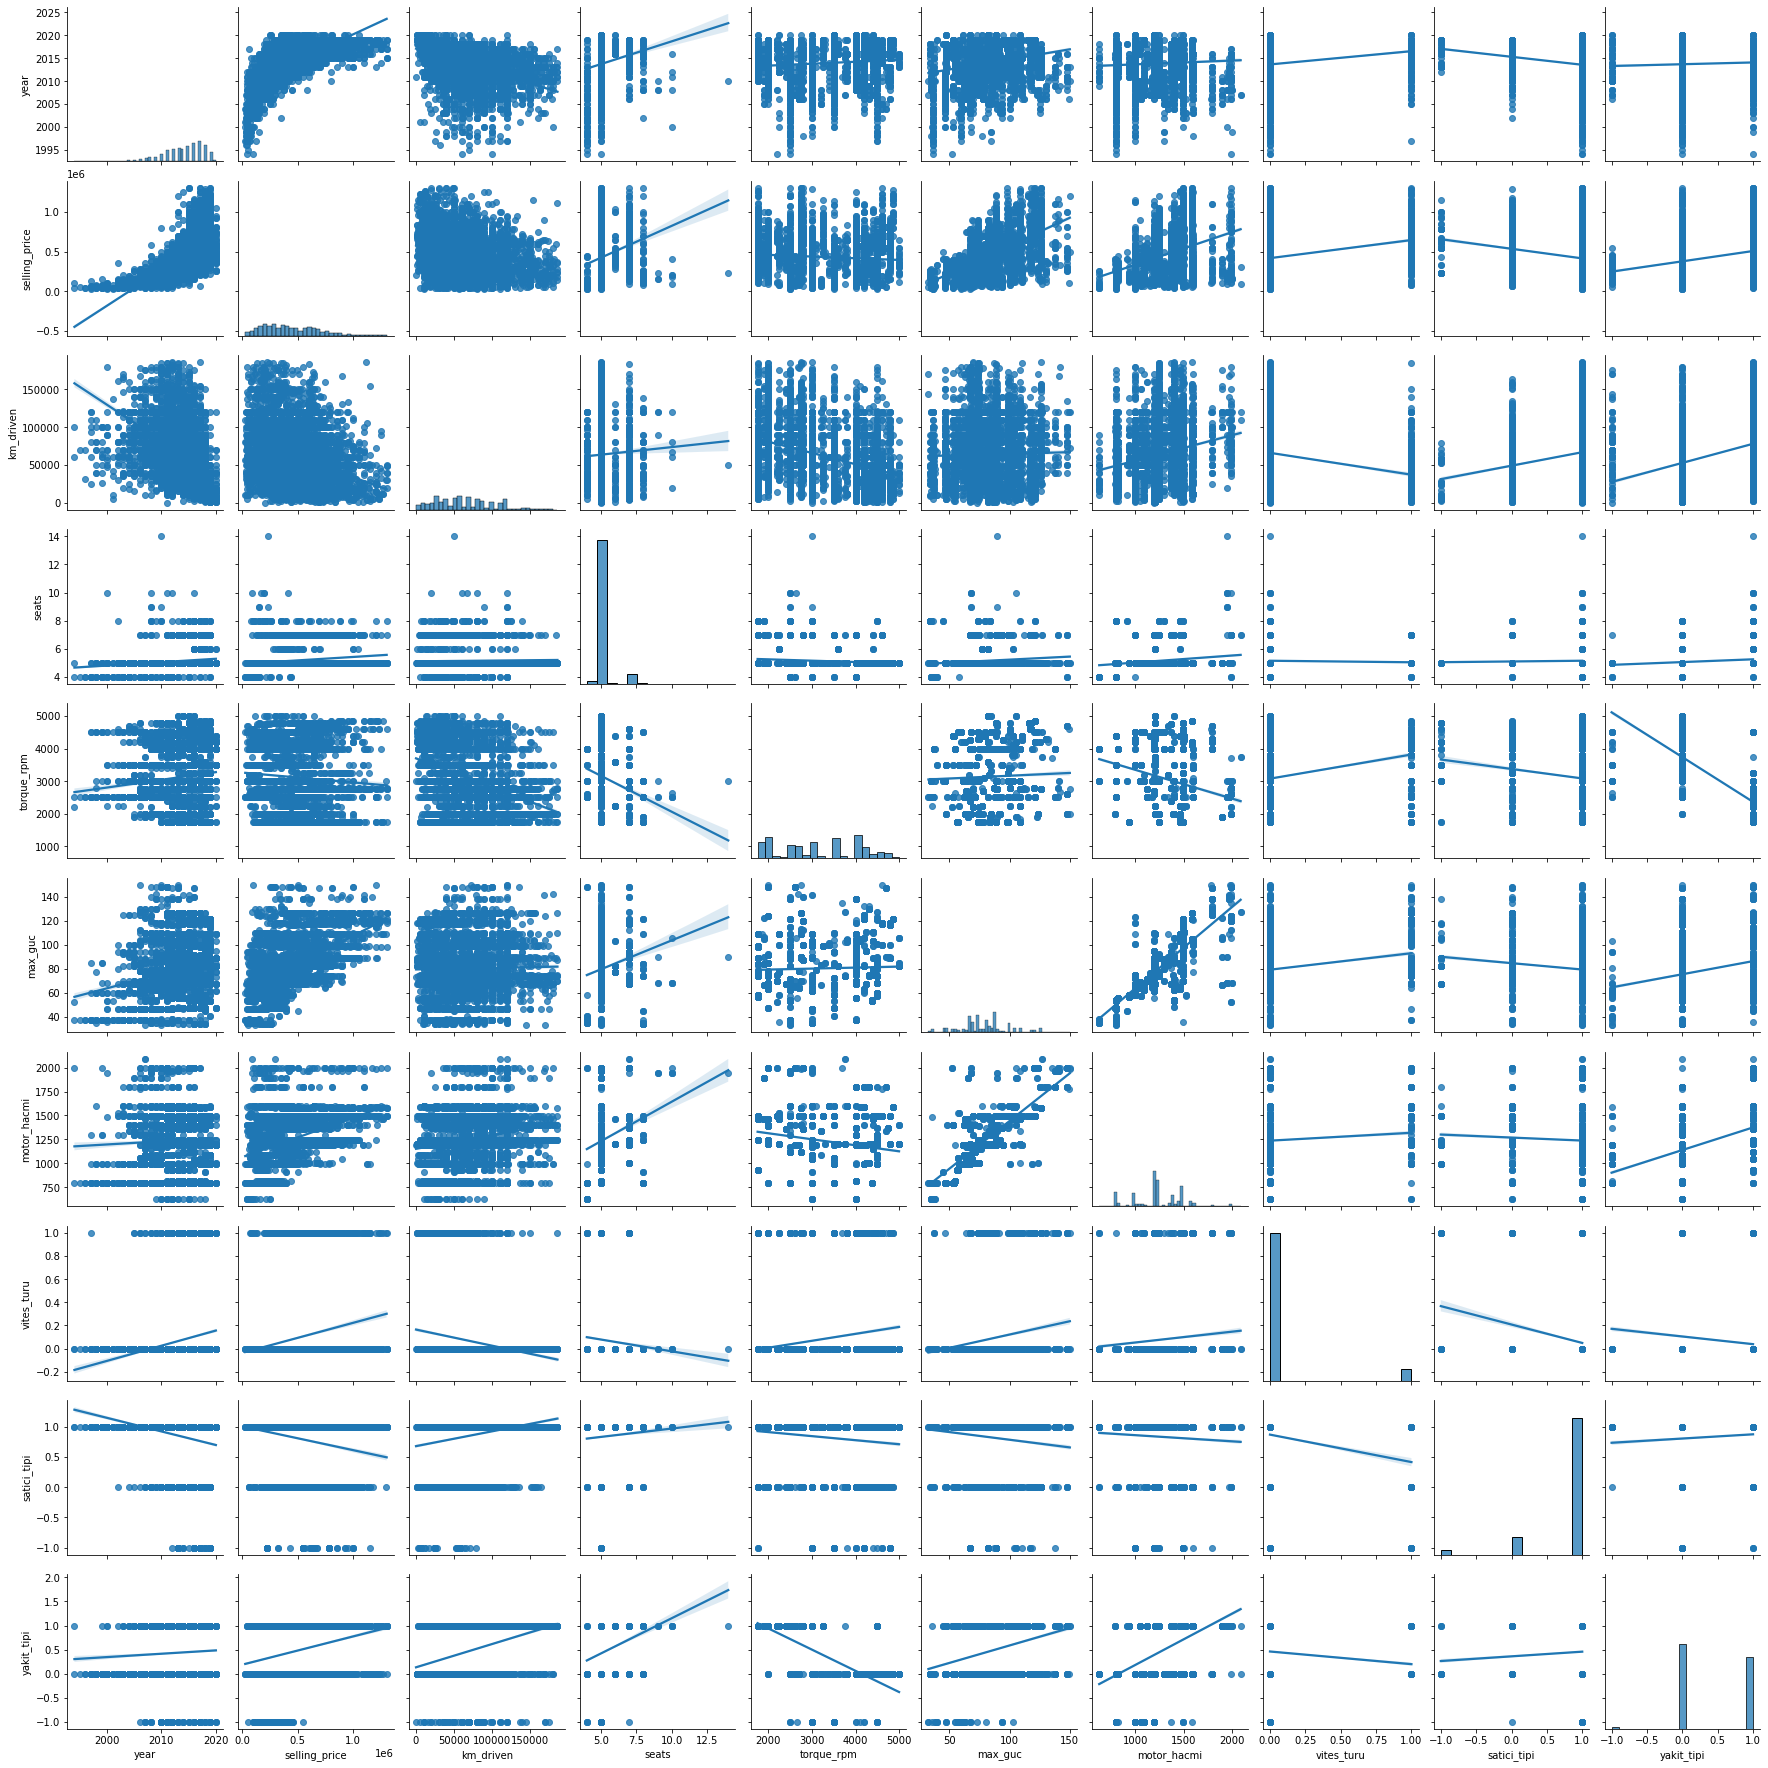

In [43]:
sns.pairplot(cars, kind = "reg")

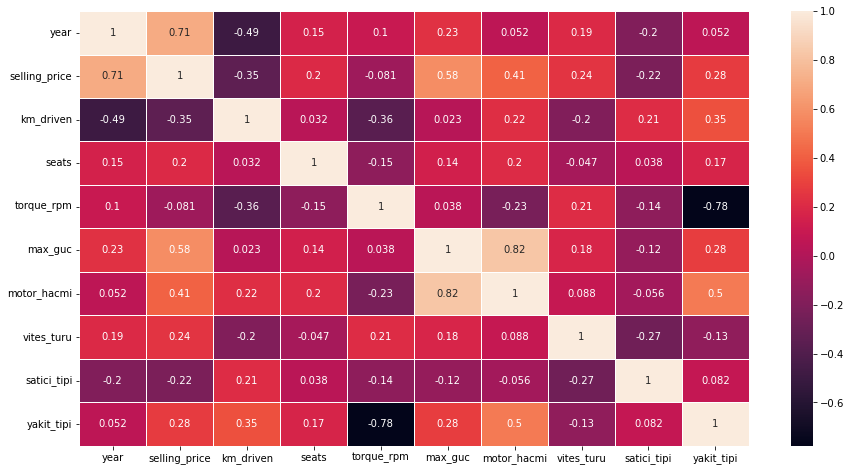

In [45]:
plt.figure(figsize = (15,8))
sns.heatmap(cars.corr(), linewidths = 0.5, annot = True)
plt.show()

1-Satış Fiyatını en çok etkileyen etmen yıl gibi görünüyor.

2-Satış fiyatı ile max güç arasında anlamlı bir korelasyon var.

3-Max güç ve motor hacmi arasında yüksek korelasyon var.(Zaten bu bekleniyordu)

4-Tork ile max güç veya motor hacmi arasında anlamlı bir korelasyon yok.

5-Tork ile yakıt tipi arasında önemli bir korelasyon var.(Benzin>Dizel>LPG)

## Model Kurma

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [48]:
X = cars.drop(["selling_price"], axis = 1)
y = cars["selling_price"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 96)

In [50]:
print("X_train",X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (4762, 9)
X_test (1191, 9)
y_train (4762,)
y_test (1191,)


#### SCALING

In [57]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [58]:
X_train_sc[0:5]

array([[0.88461538, 0.64515938, 0.1       , 0.75384615, 0.41808874,
        0.39032698, 1.        , 1.        , 0.5       ],
       [0.76923077, 0.26881327, 0.3       , 0.        , 0.4774744 ,
        0.42506812, 0.        , 1.        , 1.        ],
       [0.57692308, 0.29982419, 0.1       , 0.23076923, 0.32593857,
        0.53201635, 0.        , 1.        , 1.        ],
       [0.88461538, 0.14515669, 0.1       , 0.53846154, 0.12372014,
        0.11716621, 0.        , 1.        , 0.5       ],
       [0.76923077, 0.48386819, 0.1       , 0.07692308, 0.35153584,
        0.42506812, 0.        , 1.        , 1.        ]])

### Linear Regresyon

In [83]:
lm = LinearRegression()
lm_model = lm.fit(X_train_sc, y_train)

In [60]:
lm_model.score(X_train_sc, y_train)

0.7400605872244281

In [61]:
lm_model.score(X_test_sc, y_test)

0.7331859425400441

In [77]:
score1 = cross_val_score(lm, X, y, cv = 10)

In [78]:
score1.mean()

0.7341629230751732

### PCA 

In [53]:
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-1.03495832,  1.29026719, -1.44054178, -0.44487819,  0.72887175,
         2.90356401, -1.80951938,  0.02179416,  0.10715069]])

In [66]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))

In [62]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [67]:
pcr_model.score(X_reduced_train, y_train)

0.7400605872244301

In [68]:
pcr_model.score(X_reduced_test, y_test)

0.65336465181977

In [79]:
score2 = cross_val_score(pcr_model, X, y, cv = 10)
score2.mean()

0.7341629230751732

### RandomForest Regresyon

In [73]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 96, n_jobs = -1)

In [74]:
rf_model = rf.fit(X_train_sc, y_train)

In [75]:
rf_model.score(X_train_sc, y_train)

0.9804371330352861

In [76]:
rf_model.score(X_test_sc, y_test)

0.906464985449292

In [80]:
score3 = cross_val_score(rf_model, X, y, cv = 10)
score3.mean()

0.8993341664912096

## Pickle

In [ ]:
import pickle
saved_model = pickle.dump(rf_model, open("CarSelling.pickle", "wb"))